In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import the pandas library and assign it the alias 'pd'.
import pandas as pd

# Read an Excel file named 'Burnout.xlsx' into a DataFrame named 'dfs'.
dfs = pd.read_excel('Burnout.xlsx')
#save as csv
dfs.to_csv('Burnout.csv', index=False)

# Extract the unique values from the 'Year' column in 'dfs' and store them in 'years'.
years = dfs['Year'].unique()

# Extract the unique values from the 'Profession' column in 'dfs' and store them in 'professions'.
professions = dfs['Profession'].unique()

# Extract the unique values from the 'Gender' column in 'dfs' and store them in 'Genders'.
Genders = dfs['Gender'].unique()

# Extract the unique values from the 'Marital Status' column in 'dfs' and store them in 'marital_status'.
marital_status = dfs['Marital Status'].unique()

# Extract the unique values from the 'Age' column in 'dfs' and store them in 'ages'.
ages = dfs['Age'].unique()

# Import the numpy library and assign it the alias 'np'.
import numpy as np

# Define a list named 'burnout_levels' containing potential burnout level values.
burnout_levels = [1, 2, 3, 3.5, 4]

# Import the random library.
import random

# Convert the 'Burnout Level' column in 'dfs' to float type.
dfs['Burnout Level'] = dfs['Burnout Level'].astype('float')

# Create a copy of the 'dfs' DataFrame and assign it to 'dfs_copy'.
dfs_copy = dfs.copy()

# Randomly assign a burnout level to each row in 'dfs_copy' using values from 'burnout_levels'.
dfs_copy['Burnout Level'] = [random.choice(burnout_levels) for i in range(len(dfs))]

# Age has a normal distribution with a mean of 45 and a standard deviation of 8.
ages = [int(np.random.normal(45, 7)) for i in range(len(dfs))]
#if age is less than 25, set it to 25 and if it is greater than 75, set it to 65
ages = [40 if age < 27 else 60 if age > 70 else age for age in ages]
dfs_copy['Age'] = ages

#Years in Profession is 25 years less than age
years_in_profession = [age - 25 for age in ages]
dfs_copy['Years in Profession'] = years_in_profession

#randomly make the Years in Profession to be random between 0 and 5 if the age is less than 40 for 20% of the rows
for i in range(len(dfs_copy)):
    if dfs_copy['Age'][i] < 40 and random.random() < 0.2:
        dfs_copy['Years in Profession'][i] = random.randint(0, 5)


#marital status has a distribution of 60% married, 30% single, 10% divorce
marital_status = ['Married']*70 + ['Single']*20 + ['Divorced']*10
marital_status = [random.choice(marital_status) for i in range(len(dfs))]
dfs_copy['Marital Status'] = marital_status
#gender has a distribution of 45% and 55%
genders = ['Female']*45 + ['Male']*55
genders = [random.choice(genders) for i in range(len(dfs))]
dfs_copy['Gender'] = genders


# Define lists of professions categorized by high, middle, and low burnout levels.
high_burnout_professions = ['Emergency Medicine', 'General Surgery',  'Orthopedic Surgery', 'Surgery', 'Internal Medicine']
middle_burnout_professions = ['Urology', 'Pediatrics', 'Neurology', 'Cardiology', 'Family Medicine', 'Obstetrics/Gynecology', 'Obstetrics', 'Anesthesiology']
low_burnout_professions = ['Dermatology', 'Psychiatry', 'Pathology', 'ENT', 'Radiology', 'Ophthalmology']

# Define lists of burnout level increments for high, middle, and low burnout professions.
add_to_high = [4.25, 4, 3.75, 3.5, 3.25]
add_to_middle = [3, 3, 2.75, 2.5, 2.25, 2, 1.75, 1.5]
add_to_low = [1.75, 1.5, 1.25, 1, 0.75, 0.5]

# Create dictionaries mapping professions to their respective burnout level increments.
add_to_high_dict = dict(zip(high_burnout_professions, add_to_high))
add_to_middle_dict = dict(zip(middle_burnout_professions, add_to_middle))
add_to_low_dict = dict(zip(low_burnout_professions, add_to_low))

# Create a list of burnout level increments for each year in 'years'.
add_to_years = np.linspace(0.15, 0.55, len(years))
# Create a dictionary mapping years to their respective burnout level increments.
add_to_years_dict = dict(zip(years, add_to_years))

# Set the burnout level increment for the year 2019 to 1.
add_to_years_dict[2019] = 1

# Create a copy of 'dfs_copy' and assign it to 'df'.
df = dfs_copy.copy()

# Iterate over each row in 'df' to adjust the 'Burnout Level' based on various criteria.
for i in range(len(df)):
    # Adjust burnout level based on profession.
    if df['Profession'][i] in high_burnout_professions:
        df['Burnout Level'][i] += add_to_high_dict[df['Profession'][i]]
    elif df['Profession'][i] in middle_burnout_professions:
        df['Burnout Level'][i] += add_to_middle_dict[df['Profession'][i]]
    elif df['Profession'][i] in low_burnout_professions:
        df['Burnout Level'][i] += add_to_low_dict[df['Profession'][i]]
    else:
        print(df['Profession'][i])
    
    # Adjust burnout level based on gender.
    if df['Gender'][i] == 'Female':
        df['Burnout Level'][i] += 0.75
    else:
        df['Burnout Level'][i] += 0.25
    
    # Adjust burnout level based on marital status.
    if df['Marital Status'][i] == 'Married':
        df['Burnout Level'][i] += 0.05
    elif df['Marital Status'][i] == 'Single':
        df['Burnout Level'][i] += 0.55
    else:
        df['Burnout Level'][i] += 0.15
    
    # Adjust burnout level based on years in profession.
    if df['Years in Profession'][i] <= 4:
        df['Burnout Level'][i] += 0.45
    elif df['Years in Profession'][i] <= 10:
        df['Burnout Level'][i] += 0.15
    else:
        df['Burnout Level'][i] += 0.05
    
    # Adjust burnout level based on age.
    if df['Years in Profession'][i] <= 10:
        df['Burnout Level'][i] += 0.55
    else:
        df['Burnout Level'][i] += 0.15
    
    # Adjust burnout level based on year.
    if df['Year'][i] == 2019:
        df['Burnout Level'][i] += 1
    else:
        df['Burnout Level'][i] += add_to_years_dict[df['Year'][i]]

# Work-Life Balance has a strong negative correlation with burnout level with a correlation coefficient of -0.85. Max burnout level is 10 and min is 1. Work-Life Balance is inversely proportional to burnout level. 
# Create a list of work-life balance values based on burnout level.
work_life_balance = [int(10 - 0.9*burnout_level) for burnout_level in df['Burnout Level']]
df['Work-Life Balance'] = work_life_balance

# Job Satisfaction has a strong positive correlation with burnout level with a correlation coefficient of -0.67. Max burnout level is 10 and min is 1. Job Satisfaction is directly proportional to burnout level. 
# Create a list of job satisfaction values based on burnout level.
job_satisfaction = [int(10 - 0.67*burnout_level) for burnout_level in df['Burnout Level']]
df['Job Satisfaction'] = job_satisfaction

# change burnout leve to integer
df['Burnout Level'] = df['Burnout Level'].astype('int')

#add catagory for burnout_category
df['Burnout Category'] = ['Medium' if burnout >= 5 else 'Low' for burnout in df['Burnout Level']]
df['Burnout Category'] = ['High' if burnout >= 7 else 'Low' for burnout in df['Burnout Level']]
df

,Patient ID,Year,Age,Gender,Marital Status,Profession,Years in Profession,Work-Life Balance,Job Satisfaction,Burnout Level,Burnout Category
0,1,2014,40,Male,Married,Psychiatry,15,5,6,5,Low
1,2,2014,54,Male,Married,Internal Medicine,29,3,5,7,High
2,3,2014,37,Male,Married,Pediatrics,12,3,4,7,High
3,4,2014,38,Male,Married,Orthopedic Surgery,13,4,5,6,Low
4,5,2014,50,Female,Married,Family Medicine,25,6,7,4,Low
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2023,47,Female,Married,Radiology,22,4,5,6,Low
1996,1997,2023,34,Female,Married,Surgery,9,1,3,9,High
1997,1998,2023,52,Female,Married,ENT,27,5,6,4,Low
1998,1999,2023,45,Female,Married,Urology,20,2,4,8,High


In [4]:
#save the modified DataFrame 'df' to an Excel file named 'Burnout_Modified.xlsx'.
df.to_excel('Burnout_Modified2.xlsx', index=False)
df.to_csv('Burnout_Modified2.csv', index=False)

In [1]:
#change burnout to integer
import pandas as pd
import numpy as np

df = pd.read_csv('Burnout_Modified.csv')
df['Burnout Level'] = df['Burnout Level'].astype('int')
#add catagory for burnout_category

df['Burnout Category'] = ['Medium' if burnout >= 5 else 'Low' for burnout in df['Burnout Level']]
df['Burnout Category'] = ['High' if burnout >= 7 else 'Low' for burnout in df['Burnout Level']]
years = df['Year'].unique()
professions = df['Profession'].unique
Genders = df['Gender'].unique()
marital_status = df['Marital Status'].unique()
ages = df['Age'].unique()
Job_sat = df['Job Satisfaction'].unique()
years_in_profession = df['Years in Profession'].unique()


Slope: -0.6520936191304203
Intercept: 9.073693795590348
R Value: -0.952989501572671
P Value: 0.0
Standard Error: 0.004638434994492122


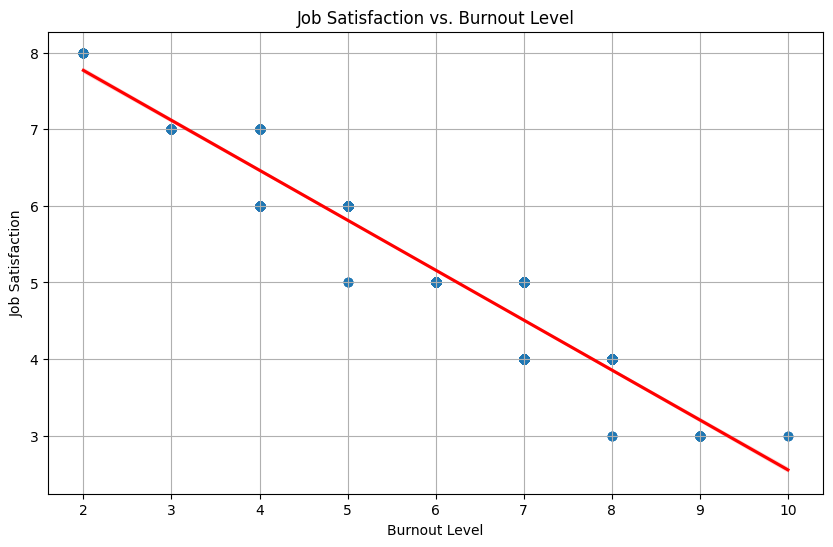

In [2]:
# do a linear regression between burnout and job satisfaction
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Burnout Level'], df['Job Satisfaction'])
print('Slope:', slope)
print('Intercept:', intercept)
print('R Value:', r_value)
print('P Value:', p_value)
print('Standard Error:', std_err)

#plot the regression line and the data points
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='Burnout Level', y='Job Satisfaction', data=df, line_kws={'color': 'red'})
plt.title('Job Satisfaction vs. Burnout Level')
plt.xlabel('Burnout Level')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.show()


In [9]:
# percent burnout per year
for year in years:
    df_year = df[df['Year'] == year]
    number_high_burnout = len(df_year[df_year['Burnout Level'] >= 7])
    number_low_burnout = len(df_year[df_year['Burnout Level'] <= 5])
    number_middle_burnout = len(df_year[(df_year['Burnout Level'] > 5) & (df_year['Burnout Level'] < 7)])
    print('Year:', year, 'len:', len(df_year), 'Number of High Burnout:', number_high_burnout, 'Number of Middle Burnout:', number_middle_burnout, 'Number of Low Burnout:', number_low_burnout)
    print('Percent High Burnout:', number_high_burnout/len(df_year), 'Percent Middle Burnout:', number_middle_burnout/len(df_year), 'Percent Low Burnout:', number_low_burnout/len(df_year))
    print('\n')
    

Year: 2014 len: 200 Number of High Burnout: 61 Number of Middle Burnout: 57 Number of Low Burnout: 82
Percent High Burnout: 0.305 Percent Middle Burnout: 0.285 Percent Low Burnout: 0.41


Year: 2015 len: 200 Number of High Burnout: 65 Number of Middle Burnout: 44 Number of Low Burnout: 91
Percent High Burnout: 0.325 Percent Middle Burnout: 0.22 Percent Low Burnout: 0.455


Year: 2016 len: 200 Number of High Burnout: 66 Number of Middle Burnout: 52 Number of Low Burnout: 82
Percent High Burnout: 0.33 Percent Middle Burnout: 0.26 Percent Low Burnout: 0.41


Year: 2017 len: 200 Number of High Burnout: 66 Number of Middle Burnout: 56 Number of Low Burnout: 78
Percent High Burnout: 0.33 Percent Middle Burnout: 0.28 Percent Low Burnout: 0.39


Year: 2018 len: 200 Number of High Burnout: 70 Number of Middle Burnout: 53 Number of Low Burnout: 77
Percent High Burnout: 0.35 Percent Middle Burnout: 0.265 Percent Low Burnout: 0.385


Year: 2019 len: 200 Number of High Burnout: 118 Number of Middle